<a href="https://colab.research.google.com/github/starkjones/US-Housing-Predictions-w-FRED-/blob/main/US_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Dictionary***

***Data from U.S. Department of Housing and Urband Development and FRED (Federal Reserve Economic Database)***

***DATE***: Month of year

***ASP_NHS***: Average Sales Price for New Houses (Thousands) Sold in the United States, Dollars, Monthly, Not Seasonally Adjusted - Economic Research Division Federal Reserve of St. Louis

***MSP_NHS***: Median Sales Price for New Houses (Thousands) Sold in the United States, Dollars, Monthly, Not Seasonally Adjusted - Economic Research Division Federal Reserve of St. Louis
  NOFHS: 

***HOUST***: New Privately-Owned Housing Units Started: Total Units
U.S. Census Bureau, U.S. Department of Housing and Urban Development

***UND_CONSTR***: New Privately-Owned Housing Units Under Construction: Total Units
U.S. Census Bureau, U.S. Department of Housing and Urban Development

***SNMH_(NSA)***: Shipments of New Manufactured Homes Not Seasonally Adjusted (Thousands)

***SNMH_(SI)***:Shipments of New Manufactured Homes Seasonally Index (Thousands)

***SNMH_(AAR)***:Shipments of New Manufactured Homes Adjsuted Annual Rate (Thousands)

***SPCS_US_NHPI***:

***M1SL***: M1 = the most liquid assests in the US money supply (cash, checking accounts, demand deposits and OCDs, Billions of Dollars, Seasonally Adjusted - Board of Governors of the Federal Reserve System (US)

***M2SL***: M2 = all components of M2 plus small denomination tiem deposits (<=100,000), savings deposits, and retial MMFs.
Billions of Dollars, Seasonally Adjusted - Board of Governors of the Federal Reserve System (US)

***TOTAL_CON_CREDIT***: Total Consumer Credit
Billions of Dollars, Seasonally Adjusted
Total Consumer Credit Owned and Securitized
Board of Governors of the Federal Reserve System (US)

***COM_IMD_LOANS***:Billions of U.S. Dollars, Seasonally Adjusted
Commercial and Industrial Loans, All Commercial Banks
Board of Governors of the Federal Reserve System (US)

***POPULATION***:

***FED_FUND_RATE***:Federal Funds Effective Rate		
Board of Governors of the Federal Reserve System (US)

***UNEMPLOYMENT_RATE***:Unemployment Rate 
- U.S. Bureau of Labor Statistics

GOODS_PRODUCING:

***LW_AUTO_SALES***:

***CPI_AUC***:Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
-U.S. Bureau of Labor Statistics


***CPI_AUC_FD***:Consumer Price Index for All Urban Consumers: Food in U.S. City Average
-U.S. Bureau of Labor Statistics


***CPI_AUC_USE***:Consumer Price Index for All Urban Consumers: Energy in U.S. City Average
-U.S. Bureau of Labor Statistics

***WTI_COP***:Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma
-U.S. Energy Information Administration


In [10]:
# Mount google drive:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Import libraries:

import pandas as pd
import numpy as np

In [12]:
# Load training data:

data = '/content/drive/MyDrive/SI/US Housing Machine Learning Data_Revised.xlsx'

df = pd.read_excel(data)

df.head()

,DATE,ASP_NHS,MSP_NHS,NOFHS,HOUST,UND_CONSTR,SNMH_(NSA),SNMH_(SI),SNMH_(AAR),SPCS_US_NHPI,...,COM_IND_LOANS,POPULATION,FED_FUND_RATE,UNEMPLOYMENT_RATE,GOODS_PRODUCING,LW_AUTO_SALES,CPI_AUC,CPI_AUC_FD,CPI_AUC-USE,WTI_COP
0,2022-03-01,523900,436700,407,1793,1622,11.3,115.552196,117,NaN,...,2520.2730,332782.634,0.18,3.6,20904,13.413,287.708,295.809,305.469,108.50
1,2022-02-01,508100,421600,392,1788,1585,9.3,96.735522,115,286.679,...,2480.6805,332717.925,0.08,3.8,20837,13.977,284.182,292.912,275.170,91.64
2,2022-01-01,499600,431100,393,1679,1556,9.1,96.210445,114,281.802,...,2477.4218,332650.428,0.08,4.0,20723,15.049,281.933,289.959,265.929,83.22
3,2021-12-01,491000,410000,387,1754,1526,8.0,87.893217,109,278.521,...,2478.0233,332629.610,0.08,3.9,20691,12.540,280.126,287.440,263.553,71.71
4,2021-11-01,498800,430300,389,1703,1490,9.1,99.081816,110,276.130,...,2438.6916,332566.553,0.08,4.2,20598,13.035,278.524,286.050,261.257,79.15


In [21]:
# Data Frame size / shape:

df.shape

(399, 23)

In [13]:
# Check for duplicated rows:

df.duplicated().sum()

0

In [14]:
 # Check for missing values:

 df.isna().sum()

DATE                 0
ASP_NHS              0
MSP_NHS              0
NOFHS                0
HOUST                0
UND_CONSTR           0
SNMH_(NSA)           0
SNMH_(SI)            0
SNMH_(AAR)           0
SPCS_US_NHPI         1
M1SL                 0
M2SL                 0
TOTAL_CON_CREDIT     0
COM_IND_LOANS        0
POPULATION           0
FED_FUND_RATE        0
UNEMPLOYMENT_RATE    0
GOODS_PRODUCING      0
LW_AUTO_SALES        0
CPI_AUC              0
CPI_AUC_FD           0
CPI_AUC-USE          0
WTI_COP              0
dtype: int64

In [32]:
# Imputation:

df['SPCS_US_NHPI'].fillna(method='ffill', inplace = True)

In [33]:
# Check to ensure that missing values are removed:

df.isna().sum()

DATE                 0
ASP_NHS              0
MSP_NHS              0
NOFHS                0
HOUST                0
UND_CONSTR           0
SNMH_(NSA)           0
SNMH_(SI)            0
SNMH_(AAR)           0
SPCS_US_NHPI         0
M1SL                 0
M2SL                 0
TOTAL_CON_CREDIT     0
COM_IND_LOANS        0
POPULATION           0
FED_FUND_RATE        0
UNEMPLOYMENT_RATE    0
GOODS_PRODUCING      0
LW_AUTO_SALES        0
CPI_AUC              0
CPI_AUC_FD           0
CPI_AUC-USE          0
WTI_COP              0
dtype: int64

In [34]:
# Check column datatypes:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               399 non-null    datetime64[ns]
 1   ASP_NHS            399 non-null    int64         
 2   MSP_NHS            399 non-null    int64         
 3   NOFHS              399 non-null    int64         
 4   HOUST              399 non-null    int64         
 5   UND_CONSTR         399 non-null    int64         
 6   SNMH_(NSA)         399 non-null    float64       
 7   SNMH_(SI)          399 non-null    float64       
 8   SNMH_(AAR)         399 non-null    int64         
 9   SPCS_US_NHPI       399 non-null    object        
 10  M1SL               399 non-null    float64       
 11  M2SL               399 non-null    float64       
 12  TOTAL_CON_CREDIT   399 non-null    float64       
 13  COM_IND_LOANS      399 non-null    float64       
 14  POPULATION

In [35]:
# # Checking value names in object columns for inconsistencies:

# datatypes = df.dtypes
# object_columns = datatypes[datatypes =='object'].index
# object_columns

# for column in object_columns:
#   print(f'Column Name = {column}')
#   print('\n')
#   print(df[column].value_counts(dropna=False))
#   print('\n\n')

In [38]:
# Correcting Data Types:

df['SPCS_US_NHPI'] = df['SPCS_US_NHPI'].astype(int)

ValueError: ignored

In [18]:
# Check for numeric annomalies: 

df.describe().round(1)

,ASP_NHS,MSP_NHS,NOFHS,HOUST,UND_CONSTR,SNMH_(NSA),SNMH_(SI),SNMH_(AAR),M1SL,M2SL,...,COM_IND_LOANS,POPULATION,FED_FUND_RATE,UNEMPLOYMENT_RATE,GOODS_PRODUCING,LW_AUTO_SALES,CPI_AUC,CPI_AUC_FD,CPI_AUC-USE,WTI_COP
count,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,...,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0
mean,260657.9,216736.3,313.1,1318.9,920.7,13.6,100.0,162.9,2721.2,7991.2,...,1276.8,294295.3,2.9,5.9,21571.3,15.3,196.4,196.7,166.9,47.6
std,89860.7,77495.1,92.5,391.1,262.5,8.8,11.2,103.6,4084.1,4683.5,...,606.6,25953.8,2.6,1.7,2018.0,2.1,42.4,45.6,56.0,28.8
min,137700.0,113000.0,142.0,478.0,414.0,2.7,72.4,40.0,773.5,2991.7,...,583.7,246224.0,0.0,3.5,17627.0,8.6,121.2,121.6,90.3,11.4
25%,172350.0,144950.0,269.0,1079.0,736.0,6.8,91.7,82.5,1102.1,3883.1,...,806.6,272212.5,0.2,4.6,19844.5,14.1,159.9,156.6,107.3,21.1
50%,263200.0,217000.0,303.0,1331.0,941.0,10.3,101.1,127.0,1370.3,6570.2,...,1078.0,296440.0,2.3,5.5,22036.0,15.7,196.1,191.1,176.4,40.8
75%,326400.0,269800.0,351.5,1583.0,1105.5,18.7,108.1,213.5,2649.4,10998.9,...,1581.1,317247.7,5.2,6.7,23169.0,16.9,234.4,238.1,213.1,68.0
max,523900.0,436700.0,572.0,2273.0,1622.0,36.0,124.2,390.0,20710.1,21809.7,...,3033.0,332782.6,9.8,14.7,24717.0,21.7,287.7,295.8,305.5,133.9


In [42]:
# Import ibraries for Visual Analysis:

import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
correlation = df.corr().round(2)
c_list = correlation.unstack().sort_values(ascending = False)

# for i in enumerate(c_list):
#   if i == 1.00:
#     'ignore'
#   else:
#     i == 1
#     print(i, column, column)
#     print('\n')

c_list.head(40)

ASP_NHS            ASP_NHS              1.00
POPULATION         POPULATION           1.00
HOUST              HOUST                1.00
UND_CONSTR         UND_CONSTR           1.00
SNMH_(NSA)         SNMH_(NSA)           1.00
SNMH_(SI)          SNMH_(SI)            1.00
SNMH_(AAR)         SNMH_(AAR)           1.00
M1SL               M1SL                 1.00
M2SL               M2SL                 1.00
COM_IND_LOANS      COM_IND_LOANS        1.00
FED_FUND_RATE      FED_FUND_RATE        1.00
MSP_NHS            MSP_NHS              1.00
UNEMPLOYMENT_RATE  UNEMPLOYMENT_RATE    1.00
GOODS_PRODUCING    GOODS_PRODUCING      1.00
LW_AUTO_SALES      LW_AUTO_SALES        1.00
CPI_AUC            CPI_AUC              1.00
                   CPI_AUC_FD           1.00
CPI_AUC_FD         CPI_AUC              1.00
                   CPI_AUC_FD           1.00
CPI_AUC-USE        CPI_AUC-USE          1.00
NOFHS              NOFHS                1.00
TOTAL_CON_CREDIT   TOTAL_CON_CREDIT     1.00
WTI_COP   

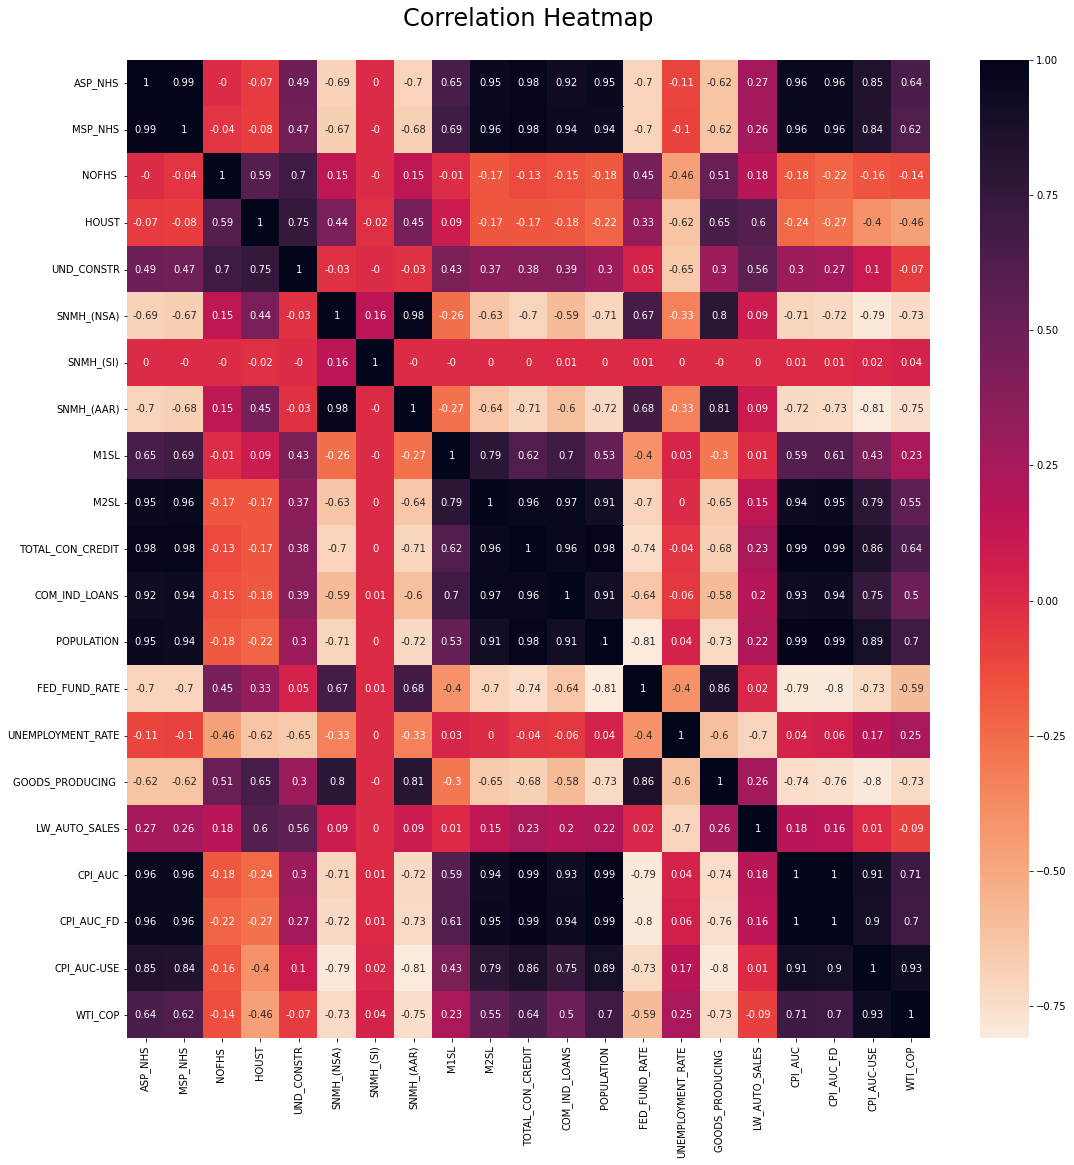

In [45]:
# Correlation heatmap soto identify correlated features:

fig, hm = plt.subplots(nrows=1, ncols =1, figsize=(18,18));
hm = sns.heatmap(correlation, cmap='rocket_r', annot=True);
hm.set_title('Correlation Heatmap\n', fontsize= 24);